In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
merged_df=pd.read_csv('/Users/buzz/Downloads/Business Modelling Project/cleaned_data.csv', index_col=False)

In [50]:
merged_df

,Unnamed: 0,store,sale.date,tran.no,tran.type,cashier,size,color,class.desc,sub.class.desc,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,season
0,0,19,2019-01-01,15553,S,2,MED,Ivory,Fashion Tops,Button Down,1,9.70,31.49,40.00,40.0,0.691966,9.70,0,Winter
1,1,19,2019-01-01,15555,S,2,SM,FOREST GREEN,Fashion Tops,Blouse,1,8.37,48.00,48.00,48.0,0.825625,8.37,0,Winter
2,2,19,2019-01-01,15557,S,2,MED,Black,Fashion Tops,Blouse,1,9.60,12.75,21.98,40.0,0.247059,9.60,1,Winter
3,3,19,2019-01-01,15557,S,2,MED,Ivory,Fashion Tops,Blouse,1,11.23,16.23,27.98,44.0,0.308071,11.23,1,Winter
4,4,19,2019-01-01,15561,S,2,Extra Small,Ivory,Fashion Tops,Blouse,1,11.23,14.95,27.98,44.0,0.248829,11.23,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55440,50922,27,2019-12-31,28028,S,2,SM,Gray,"Cardigans,Wraps,Sweaters",Pullover Sweater,1,9.28,29.98,29.98,44.0,0.690460,9.28,1,Fall
55441,50923,27,2019-12-31,28028,S,2,MED,Blush,"Cardigans,Wraps,Sweaters",Short Cardigans,1,11.33,29.98,29.98,44.0,0.622081,11.33,1,Fall
55442,50924,27,2019-12-31,28028,S,2,SM,Gray,"Cardigans,Wraps,Sweaters",Pullover Sweater,1,10.84,44.00,44.00,44.0,0.753636,10.84,0,Fall
55443,50925,27,2019-12-31,28032,S,2,LG,Black,Fashion Tops,Blouse,1,8.96,29.19,38.00,38.0,0.693046,8.96,0,Fall


In [51]:
merged_df=merged_df.drop(['sale.date', 'tran.no','tran.type', 'cashier','class.desc','color'
              ],axis=1)

In [52]:
merged_df.head()

,Unnamed: 0,store,size,sub.class.desc,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,season
0,0,19,MED,Button Down,1,9.70,31.49,40.00,40.0,0.691966,9.70,0,Winter
1,1,19,SM,Blouse,1,8.37,48.00,48.00,48.0,0.825625,8.37,0,Winter
2,2,19,MED,Blouse,1,9.60,12.75,21.98,40.0,0.247059,9.60,1,Winter
3,3,19,MED,Blouse,1,11.23,16.23,27.98,44.0,0.308071,11.23,1,Winter
4,4,19,Extra Small,Blouse,1,11.23,14.95,27.98,44.0,0.248829,11.23,1,Winter


In [53]:
# Create dummies for the 'Size' column
size_dummies = pd.get_dummies(merged_df['size'])
merged_df = pd.concat([merged_df, size_dummies], axis=1)
merged_df.drop('size', axis=1, inplace=True)

In [54]:
merged_df = merged_df.rename(columns={'SM': 'Size_S', 'Extra Small': 'Size_XS', 'LG': 'Size_L', 'M/L': 'Size_M/L', 'MED': 'Size_M', 'S/M': 'Size_S/M', 'XL': 'Size_XL', 'XXS': 'Size_XXS'})


In [55]:
# Create dummies for the 'season' column
season_dummies = pd.get_dummies(merged_df['season'])
merged_df = pd.concat([merged_df, season_dummies], axis=1)
merged_df.drop('season', axis=1, inplace=True)

In [56]:
# Create dummies for the 'sub.class' column
subclass_dummies = pd.get_dummies(merged_df['sub.class.desc'])
merged_df = pd.concat([merged_df, subclass_dummies], axis=1)
merged_df.drop('sub.class.desc', axis=1, inplace=True)

In [57]:
merged_df = merged_df.rename(columns={'Button Down': 'Button_Down', 'Long Cardigans': 'Long_Cardigans', 'Long Sleeve Knits': 'Long_Sleeve_Knits', 'Misc Fashion Tops': 'Misc_Fashion_Tops', 'Pullover Sweater': 'Pullover_Sweater', 'Short Cardigans': 'Short_Cardigans', 'Short Sleeve Knits': 'Short_Sleeve_Knits', 'Sleeveless Woven Tanks': 'Sleeveless_Woven_Tanks','Sweater Tanks and Tanks': 'Sweater_Tanks_and_Tanks', 'Traditional Cardigan':'Traditional_Cardigan'})


# Cluster Analysis

In [58]:
df_cluster=merged_df[['unit','sale.amt', 'unit.current.retail', 'unit.original.retail','gross_margin', 'cost']]

In [59]:
df_cluster

,unit,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost
0,1,31.49,40.00,40.0,0.691966,9.70
1,1,48.00,48.00,48.0,0.825625,8.37
2,1,12.75,21.98,40.0,0.247059,9.60
3,1,16.23,27.98,44.0,0.308071,11.23
4,1,14.95,27.98,44.0,0.248829,11.23
...,...,...,...,...,...,...
55440,1,29.98,29.98,44.0,0.690460,9.28
55441,1,29.98,29.98,44.0,0.622081,11.33
55442,1,44.00,44.00,44.0,0.753636,10.84
55443,1,29.19,38.00,38.0,0.693046,8.96


In [60]:
#data scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #initialize
scaler.fit(df_cluster)
scaled_df=scaler.transform(df_cluster)

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
wcv = []
silk_score = []

for i in range(2,15):
    km = KMeans(n_clusters=i, random_state = 0) #initialize
    km.fit(scaled_df) #train: identify clusters

    #Calculating the within cluster variation& silk score
    wcv.append(km.inertia_) #wcv
    silk_score.append(silhouette_score(scaled_df, km.labels_)) #Silk_score

Text(0, 0.5, 'Within cluster variation')

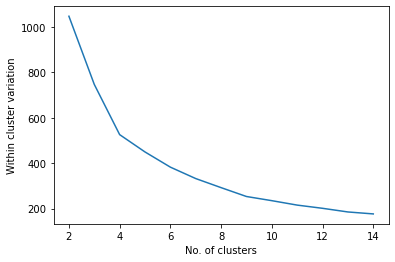

In [63]:
#Plotting the wcv
plt.plot(range(2,15), wcv)
plt.xlabel('No. of clusters')
plt.ylabel('Within cluster variation')

Text(0, 0.5, 'Silk score')

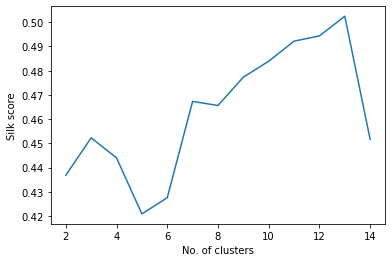

In [64]:
#Silk score
plt.plot(range(2,15), silk_score)
plt.xlabel('No. of clusters')
plt.ylabel('Silk score')

In [65]:
#So we can go with 2 clusters, based on the info in the graphs
km4=KMeans(n_clusters=2, random_state=0)#initialize
km4.fit(scaled_df)#train: identify clusters

KMeans(n_clusters=2, random_state=0)

In [66]:
merged_df['labels']=km4.labels_

###interpret the clusters
df_cluster=merged_df.groupby('labels').mean()

In [67]:
df_cluster
pd.set_option('display.max_columns', None)


In [68]:
df_cluster

,Unnamed: 0,store,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,Size_XS,Size_L,Size_M/L,Size_M,No Size,Size_S/M,Size_S,Size_XL,Size_XXS,Fall,Spring,Summer,Winter,Blouse,Bodysuits,Button_Down,Kimono,Long_Cardigans,Long_Sleeve_Knits,Misc_Fashion_Tops,Pullover_Sweater,Short_Cardigans,Short_Sleeve_Knits,Sleeveless_Woven_Tanks,Sweater_Tanks_and_Tanks,Sweatshirt,Traditional_Cardigan,Vest
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23337.294416,15.381074,1.003566,8.964557,23.752213,32.206209,37.115562,0.549207,8.995898,0.262815,0.127537,0.159022,0.000029,0.310014,0.000029,0.000058,0.306245,0.035486,0.061579,0.260263,0.253566,0.318480,0.167691,0.221327,0.012728,0.108605,0.003798,0.008930,0.085063,0.000058,0.012815,0.001566,0.294735,0.198017,0.043285,0.007451,0.000783,0.000841
1,23958.771775,15.368205,1.003054,10.967013,31.295242,45.198611,47.046342,0.614608,11.000946,0.108529,0.053739,0.179306,0.000907,0.361762,0.000000,0.000716,0.361476,0.028683,0.013411,0.421801,0.223452,0.166325,0.188422,0.169761,0.000000,0.151721,0.015559,0.057462,0.000668,0.000000,0.405765,0.099318,0.002577,0.050208,0.010213,0.022049,0.012122,0.002577


In [69]:
merged_df['labels'].value_counts()

0    34492
1    20953
Name: labels, dtype: int64

In [100]:
df_c0=merged_df[merged_df['labels']== 0]
df_c0
df_c0.to_csv('cluster1.csv')

In [101]:
df_c1=merged_df[merged_df['labels']== 1]
df_c1


,Unnamed: 0,store,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,Size_XS,Size_L,Size_M/L,Size_M,No Size,Size_S/M,Size_S,Size_XL,Size_XXS,Fall,Spring,Summer,Winter,Blouse,Bodysuits,Button_Down,Kimono,Long_Cardigans,Long_Sleeve_Knits,Misc_Fashion_Tops,Pullover_Sweater,Short_Cardigans,Short_Sleeve_Knits,Sleeveless_Woven_Tanks,Sweater_Tanks_and_Tanks,Sweatshirt,Traditional_Cardigan,Vest,labels
1,1,19,1,8.3700,48.00,48.0,48.0,0.825625,8.3700,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,8,19,1,10.3400,40.80,48.0,48.0,0.746569,10.3400,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9,9,19,1,9.8500,48.00,48.0,48.0,0.794792,9.8500,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
10,10,19,1,9.8500,48.00,48.0,48.0,0.794792,9.8500,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12,12,19,1,10.3400,48.00,48.0,48.0,0.784583,10.3400,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55431,50913,27,1,11.3518,33.52,44.0,44.0,0.661342,11.3518,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
55433,50915,27,1,11.3300,44.00,44.0,44.0,0.742500,11.3300,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55434,50916,27,1,12.8100,33.81,44.0,44.0,0.621118,12.8100,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
55442,50924,27,1,10.8400,44.00,44.0,44.0,0.753636,10.8400,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [102]:
df_c1['unit.original.retail'].mean()

47.04634181262826

In [96]:
c11=df_c0.groupby('store')['store'].count()

In [97]:
c12=merged_df.groupby('store')['store'].count()

In [99]:
perc1=c11/c12
perc1

store
3     0.649072
7     0.603229
11    0.584065
13    0.542612
14    0.660838
16    0.640349
19    0.658256
20    0.617115
21    0.602988
27    0.599766
Name: store, dtype: float64

In [71]:
x_store=df_c0.groupby('store')['store'].count()

In [72]:
y_store=merged_df.groupby('store')['store'].count()

In [73]:
perc=x_store/y_store*100
perc

store
3     64.907207
7     60.322937
11    58.406450
13    54.261168
14    66.083755
16    64.034856
19    65.825587
20    61.711546
21    60.298755
27    59.976629
Name: store, dtype: float64

##### Store 13 & store 14 has around 19% to 20% of their total inventory in clearance. These store lie in the border region 
##### of cluster segregation. Not much work is required to move it into cluster 1. Size and subclass consideration in these stores
##### can improve the marginand reduce the product on clearance.


In [74]:
store13=merged_df[merged_df['store']== 13]

In [75]:
store13

,Unnamed: 0,store,unit,unit.cost,sale.amt,unit.current.retail,unit.original.retail,gross_margin,cost,product clearance,Size_XS,Size_L,Size_M/L,Size_M,No Size,Size_S/M,Size_S,Size_XL,Size_XXS,Fall,Spring,Summer,Winter,Blouse,Bodysuits,Button_Down,Kimono,Long_Cardigans,Long_Sleeve_Knits,Misc_Fashion_Tops,Pullover_Sweater,Short_Cardigans,Short_Sleeve_Knits,Sleeveless_Woven_Tanks,Sweater_Tanks_and_Tanks,Sweatshirt,Traditional_Cardigan,Vest,labels
20130,15612,13,1,10.84,32.59,40.00,40.0,0.667383,10.84,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20131,15613,13,1,7.14,25.41,30.00,30.0,0.719008,7.14,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
20132,15614,13,1,10.10,24.98,24.98,44.0,0.595677,10.10,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20133,15615,13,1,10.10,27.98,27.98,44.0,0.639028,10.10,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20134,15616,13,1,12.31,12.75,21.98,40.0,0.034510,12.31,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,18517,13,1,11.82,38.32,48.00,48.0,0.691545,11.82,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
23036,18518,13,1,14.13,41.29,54.00,54.0,0.657786,14.13,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
23037,18519,13,1,5.91,19.98,19.98,30.0,0.704204,5.91,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
23038,18520,13,1,10.05,31.89,38.00,38.0,0.684854,10.05,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
x_pc=df_c0.groupby('product clearance')['product clearance'].count()
y_pc=merged_df.groupby('product clearance')['product clearance'].count()
perc1=x_pc/y_pc*100
perc1

product clearance
0    57.649753
1    79.945321
Name: product clearance, dtype: float64

In [77]:
categorical_columns = [col for col in df_c0.columns if 'Size_' in col or 'Season_' in col]

for col in categorical_columns:
    print(col, df_c0[col].sum())

Size_XS 4399
Size_L 5485
Size_M/L 1
Size_M 10693
Size_S/M 2
Size_S 10563
Size_XL 1224
Size_XXS 2124


In [82]:
categorical_columns1 = [col for col in merged_df.columns if 'Size_' in col or 'Season_' in col]

for col in categorical_columns1:
    print(col, merged_df[col].sum())

Size_XS 5525
Size_L 9242
Size_M/L 20
Size_M 18273
Size_S/M 17
Size_S 18137
Size_XL 1825
Size_XXS 2405


In [83]:
# Create a dictionary to hold the total for each size
size_totals = {}

# Loop through the size columns and calculate the total for each size
for col in categorical_columns1:
    size_totals[col] = merged_df[col].sum()



In [85]:

# Loop through the size columns again and calculate the percentage of each size by total of that size
for col in categorical_columns1:
    if 'Size_' in col:
        size_percent = (df_c0[col].sum() / size_totals[col]) * 100
        print(col, round(size_percent, 2))



Size_XS 79.62
Size_L 59.35
Size_M/L 5.0
Size_M 58.52
Size_S/M 11.76
Size_S 58.24
Size_XL 67.07
Size_XXS 88.32


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to hold the total for each size
size_totals = {}

# Loop through the size columns and calculate the total for each size
for col in categorical_columns1:
    size_totals[col] = merged_df[col].sum()

# Loop through the size columns again and calculate the percentage of each size by total of that size
size_data = []
for col in categorical_columns1:
    if 'Size_' in col:
        size_percent = (df_c0[col].sum() / size_totals[col]) * 100
        size_data.append([col, round(size_percent, 2)])

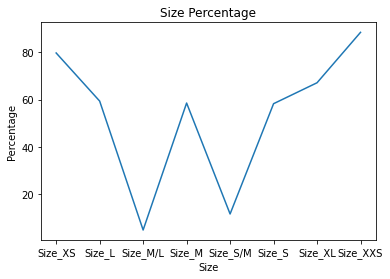

In [91]:
size_df = pd.DataFrame(size_data, columns=['Size', 'Percentage'])
size_df
# Plot a line graph
plt.plot(size_df['Size'], size_df['Percentage'])
plt.title('Size Percentage')
plt.xlabel('Size')
plt.ylabel('Percentage')
plt.show()

##### Store should try to bring the inventory of Size_XXS,XS down to reduce the product clearance.

In [35]:
categorical_columns = ['Blouse', 'Bodysuits', 'Button_Down', 'Kimono', 'Long_Cardigans', 'Long_Sleeve_Knits', 'Misc_Fashion_Tops', 'Pullover_Sweater', 'Short_Cardigans', 'Short_Sleeve_Knits', 'Sleeveless_Woven_Tanks', 'Sweater_Tanks_and_Tanks', 'Sweatshirt', 'Traditional_Cardigan', 'Vest']

for col in categorical_columns:
    print(col, df_c0[col].sum())

Blouse 7634
Bodysuits 439
Button_Down 3746
Kimono 131
Long_Cardigans 308
Long_Sleeve_Knits 2934
Misc_Fashion_Tops 2
Pullover_Sweater 442
Short_Cardigans 54
Short_Sleeve_Knits 10166
Sleeveless_Woven_Tanks 6830
Sweater_Tanks_and_Tanks 1493
Sweatshirt 257
Traditional_Cardigan 27
Vest 29


In [38]:
categorical_columns1 = ['Blouse', 'Bodysuits', 'Button_Down', 'Kimono', 'Long_Cardigans', 'Long_Sleeve_Knits', 'Misc_Fashion_Tops', 'Pullover_Sweater', 'Short_Cardigans', 'Short_Sleeve_Knits', 'Sleeveless_Woven_Tanks', 'Sweater_Tanks_and_Tanks', 'Sweatshirt', 'Traditional_Cardigan', 'Vest']

for col in categorical_columns1:
    print(col, merged_df[col].sum())
    
for col in categorical_columns1:
    total = merged_df[col].sum()
    print(col, "{:.2%}".format(df_c0[col].sum() / total))


Blouse 11191
Bodysuits 439
Button_Down 6925
Kimono 457
Long_Cardigans 1512
Long_Sleeve_Knits 2948
Misc_Fashion_Tops 2
Pullover_Sweater 8944
Short_Cardigans 2135
Short_Sleeve_Knits 10220
Sleeveless_Woven_Tanks 7882
Sweater_Tanks_and_Tanks 1707
Sweatshirt 719
Traditional_Cardigan 281
Vest 83
Blouse 68.22%
Bodysuits 100.00%
Button_Down 54.09%
Kimono 28.67%
Long_Cardigans 20.37%
Long_Sleeve_Knits 99.53%
Misc_Fashion_Tops 100.00%
Pullover_Sweater 4.94%
Short_Cardigans 2.53%
Short_Sleeve_Knits 99.47%
Sleeveless_Woven_Tanks 86.65%
Sweater_Tanks_and_Tanks 87.46%
Sweatshirt 35.74%
Traditional_Cardigan 9.61%
Vest 34.94%
